In [ ]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.4f}'.format
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn import metrics

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
drive.mount('/content/drive',force_remount = True)

Mounted at /content/drive


---
# 一、KNN補值

In [ ]:
result = pd.read_csv('/content/drive/MyDrive/🍟愛與羈絆的製造小組🍟/data/center_all_1721.csv', encoding="utf-8-sig")
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53754 entries, 0 to 53753
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   time            53754 non-null  object
 1   StnPres         53754 non-null  object
 2   SeaPres         53754 non-null  object
 3   StnPresMax      53754 non-null  object
 4   StnPresMaxTime  53754 non-null  object
 5   StnPresMin      53754 non-null  object
 6   StnPresMinTime  53754 non-null  object
 7   Temperature     53754 non-null  object
 8   T Max           53754 non-null  object
 9   T Max Time      53754 non-null  object
 10  T Min           53754 non-null  object
 11  T Min Time      53754 non-null  object
 12  Td dew point    53754 non-null  object
 13  RH              53754 non-null  object
 14  RHMin           53754 non-null  object
 15  RHMinTime       53754 non-null  object
 16  WS              53754 non-null  object
 17  WD              53754 non-null  object
 18  WSGust

In [ ]:
dataset = result.copy()
time_cloumn=["StnPresMaxTime",
             "StnPresMinTime",
             #"time", 後面再跟再跟city跟station一起拿掉
             "T Max Time",
             "T Min Time",
             "RHMinTime",
             "WGustTime",
             "PrecpMax10Time",
             "PrecpMax60Time",
             "UVI Max Time"]
category_column = ['station', 'city',"time"]
dataset = dataset.drop(columns=time_cloumn)

In [ ]:
dataset.shape

(53754, 28)

In [ ]:
dataset.head()

,time,StnPres,SeaPres,StnPresMax,StnPresMin,Temperature,T Max,T Min,Td dew point,RH,RHMin,WS,WD,WSGust,WDGust,Precp,PrecpHour,PrecpMax10,PrecpMax60,SunShine,SunShineRate,GloblRad,VisbMean,EvapA,UVI Max,Cloud Amount,station,city
0,2020-10-01,1009.5,1010.7,1011.3,1007.7,24.9,29.4,20.4,18.9,71,42,2.7,70,10.7,80,0.0,0.0,0.0,0.0,6.4,54.1,13.81,24.3,3.5,...,3.6,466880,center
1,2020-10-02,1009.8,1011.0,1011.2,1007.5,26.8,31.7,23.7,20.6,70,40,2.9,70,12.8,80,0.0,0.0,0.0,0.0,8.3,70.4,17.5,23.5,4.1,...,2.8,466880,center
2,2020-10-03,1009.4,1010.6,1010.8,1006.8,27.8,33.6,21.5,20.5,67,40,2.1,70,8.7,80,0.0,0.0,0.0,0.0,8.3,70.5,16.37,29.4,4.6,...,1.4,466880,center
3,2020-10-04,1008.4,1009.6,1010.5,1005.1,28.6,35.3,22.9,20.7,65,32,1.9,70,9.4,60,0.0,0.0,0.0,0.0,8.2,69.8,15.19,26.3,-3.5,...,1.3,466880,center
4,2020-10-05,1012.5,1013.7,1015.4,1010.1,24.3,26.9,22.6,21.5,85,73,2.7,70,9.7,70,1.0,5.8,0.5,0.5,0.0,0.0,0.87,13.9,-0.6,...,9.3,466880,center


## 處理空值

In [ ]:
dataset = dataset.replace("&",np.nan).replace("/",np.nan)
dataset = dataset.replace("T",0.05).replace("...",np.nan).replace("X",np.nan)
dataset

,time,StnPres,SeaPres,StnPresMax,StnPresMin,Temperature,T Max,T Min,Td dew point,RH,RHMin,WS,WD,WSGust,WDGust,Precp,PrecpHour,PrecpMax10,PrecpMax60,SunShine,SunShineRate,GloblRad,VisbMean,EvapA,UVI Max,Cloud Amount,station,city
0,2020-10-01,1009.5,1010.7,1011.3,1007.7,24.9,29.4,20.4,18.9,71,42,2.7,70,10.7,80,0.0,0.0,0.0,0.0,6.4,54.1,13.81,24.3,3.5,NaN,3.6,466880,center
1,2020-10-02,1009.8,1011.0,1011.2,1007.5,26.8,31.7,23.7,20.6,70,40,2.9,70,12.8,80,0.0,0.0,0.0,0.0,8.3,70.4,17.5,23.5,4.1,NaN,2.8,466880,center
2,2020-10-03,1009.4,1010.6,1010.8,1006.8,27.8,33.6,21.5,20.5,67,40,2.1,70,8.7,80,0.0,0.0,0.0,0.0,8.3,70.5,16.37,29.4,4.6,NaN,1.4,466880,center
3,2020-10-04,1008.4,1009.6,1010.5,1005.1,28.6,35.3,22.9,20.7,65,32,1.9,70,9.4,60,0.0,0.0,0.0,0.0,8.2,69.8,15.19,26.3,-3.5,NaN,1.3,466880,center
4,2020-10-05,1012.5,1013.7,1015.4,1010.1,24.3,26.9,22.6,21.5,85,73,2.7,70,9.7,70,1.0,5.8,0.5,0.5,0.0,0.0,0.87,13.9,-0.6,NaN,9.3,466880,center
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53749,2020-09-26,1002.9000,1013.7000,1005.2000,1001.2000,22.7000,24.9000,18.3000,18.7000,79,69,4.2,40,12.8,40,10.5,5.5000,1.0,3.0,0.0000,0.0000,6.3800,14.7,-1.2,4,9.8,467990,center
53750,2020-09-27,1004.1000,1014.9000,1005.7000,1003.0000,20.1000,21.4000,18.9000,17.9000,87,78,2.8,360,12.2,330,12.0,7.1000,1.0,4.0,0.0000,0.0000,3.6800,14.2,-0.2,2,10.0,467990,center
53751,2020-09-28,1002.9000,1013.7000,1004.8000,1001.3000,21.2000,22.7000,20.0000,19.5000,90,82,2.6,360,11.6,350,11.0,7.5000,1.5,5.0,0.0000,0.0000,3.8400,16.7,0.0,3,10.0,467990,center
53752,2020-09-29,1000.3000,1011.0000,1002.6000,998.2000,21.7000,23.3000,20.6000,19.9000,89,83,2.2,10,7.7,30,2.0,1.2000,1.0,1.0,0.0000,0.0000,5.4500,19.7,-1.0,4,10.0,467990,center


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53754 entries, 0 to 53753
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   time          53754 non-null  object
 1   StnPres       52525 non-null  object
 2   SeaPres       52502 non-null  object
 3   StnPresMax    52508 non-null  object
 4   StnPresMin    52505 non-null  object
 5   Temperature   52513 non-null  object
 6   T Max         52492 non-null  object
 7   T Min         52495 non-null  object
 8   Td dew point  52470 non-null  object
 9   RH            52468 non-null  object
 10  RHMin         52374 non-null  object
 11  WS            52529 non-null  object
 12  WD            52528 non-null  object
 13  WSGust        52511 non-null  object
 14  WDGust        52512 non-null  object
 15  Precp         52536 non-null  object
 16  PrecpHour     52006 non-null  object
 17  PrecpMax10    52514 non-null  object
 18  PrecpMax60    52508 non-null  object
 19  SunS

### 將資料型態轉換為數值資料

In [ ]:
for col in dataset.columns:
    if col not in category_column:
      dataset[col] = pd.to_numeric(dataset[col], errors='coerce')
    else:
      print(col)
      dataset[col] = dataset[col].astype(str)

dataset.info()

time
station
city
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53754 entries, 0 to 53753
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   time          53754 non-null  object 
 1   StnPres       52525 non-null  float64
 2   SeaPres       52502 non-null  float64
 3   StnPresMax    52508 non-null  float64
 4   StnPresMin    52505 non-null  float64
 5   Temperature   52513 non-null  float64
 6   T Max         52492 non-null  float64
 7   T Min         52495 non-null  float64
 8   Td dew point  52470 non-null  float64
 9   RH            52468 non-null  float64
 10  RHMin         52374 non-null  float64
 11  WS            52529 non-null  float64
 12  WD            52528 non-null  float64
 13  WSGust        52511 non-null  float64
 14  WDGust        52512 non-null  float64
 15  Precp         52536 non-null  float64
 16  PrecpHour     52006 non-null  float64
 17  PrecpMax10    52514 non-null  float64
 18  PrecpMax

### 檢視空值

In [ ]:
print('原始資料各發電廠資料數量：', sorted(Counter(dataset['station']).items()))
print('---')
print('刪除空值後各發電廠資料數量：', sorted(Counter(dataset.dropna(axis=0)['station']).items()))

原始資料各發電廠資料數量： [('466880', 1734), ('466900', 1734), ('466910', 1734), ('466920', 1734), ('466930', 1734), ('466940', 1734), ('466950', 1734), ('466990', 1734), ('467050', 1734), ('467060', 1734), ('467080', 1734), ('467110', 1734), ('467270', 1734), ('467300', 1734), ('467350', 1734), ('467410', 1734), ('467420', 1734), ('467440', 1734), ('467480', 1734), ('467490', 1734), ('467530', 1734), ('467540', 1734), ('467550', 1734), ('467571', 1734), ('467590', 1734), ('467610', 1734), ('467620', 1734), ('467650', 1734), ('467660', 1734), ('467770', 1734), ('467990', 1734)]
---
刪除空值後各發電廠資料數量： [('466910', 1438), ('466920', 1643), ('466940', 1592), ('466990', 1717), ('467050', 1623), ('467080', 1659), ('467110', 1724), ('467270', 532), ('467300', 359), ('467350', 1696), ('467440', 1670), ('467480', 1706), ('467490', 1683), ('467550', 820), ('467571', 1718), ('467590', 1659), ('467620', 1698), ('467650', 1711), ('467660', 1687), ('467990', 1708)]


中央氣象局測站觀測的天氣變數比較多，但全台大概只有30個，因此有許多觀測站的天氣變數有缺值

In [ ]:
print(f"含空值筆數有{dataset.dropna(axis=0).shape[0]}筆。\n比例佔{round((dataset.shape[0]-dataset.dropna(axis=0).shape[0])/dataset.shape[0],3)}%")

含空值筆數有30043筆。
比例佔0.441%


In [ ]:
NA = {}
for i in dataset.columns:
  NA[i] = [sum(dataset[i].isna())]

In [ ]:
pd.DataFrame(NA).T.sort_values(0,ascending = False)

,0
UVI Max,18407
EvapA,10591
Cloud Amount,7468
VisbMean,7090
PrecpHour,1748
RHMin,1380
GloblRad,1377
SunShineRate,1367
SunShine,1356
RH,1286


In [ ]:
dataset.sort_values("time")

,time,StnPres,SeaPres,StnPresMax,StnPresMin,Temperature,T Max,T Min,Td dew point,RH,RHMin,WS,WD,WSGust,WDGust,Precp,PrecpHour,PrecpMax10,PrecpMax60,SunShine,SunShineRate,GloblRad,VisbMean,EvapA,UVI Max,Cloud Amount,station,city
14237,2017-01-01,1017.6000,1020.2000,1020.1000,1015.7000,20.4000,25.5000,16.9000,16.8000,81.0000,62.0000,4.0000,20.0000,13.3000,10.0000,0.0000,0.0000,0.0000,0.0000,10.0000,94.6000,15.1600,14.0000,3.2000,5.0000,0.5000,467050,center
365,2017-01-01,1019.4000,1020.6000,1022.0000,1016.9000,22.3000,27.3000,17.9000,15.4000,65.0000,55.0000,2.9000,70.0000,9.2000,90.0000,0.0000,0.0000,0.0000,0.0000,6.0000,56.8000,10.2200,20.8000,3.0000,nan,1.0000,466880,center
5567,2017-01-01,1017.0000,1020.6000,1019.8000,1014.6000,22.6000,27.3000,19.9000,15.8000,66.0000,54.0000,3.4000,50.0000,11.7000,80.0000,0.0000,0.0000,0.0000,0.0000,9.0000,85.2000,15.1200,28.0000,3.5000,6.0000,1.4000,466920,center
52385,2017-01-01,1013.2000,1024.3000,1016.1000,1010.9000,15.4000,18.6000,14.2000,12.6000,83.0000,75.0000,3.0000,10.0000,10.7000,10.0000,0.0000,0.0000,0.0000,0.0000,6.5000,62.0000,10.0800,15.7000,2.0000,5.0000,6.5000,467990,center
22907,2017-01-01,1015.5000,1020.8000,1017.4000,1013.7000,21.0000,23.6000,19.9000,17.5000,80.0000,76.0000,8.0000,10.0000,12.9000,20.0000,0.0000,0.0000,0.0000,0.0000,5.0000,46.8000,10.9600,11.0000,2.5000,0.0000,7.3000,467300,center
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50650,2021-09-30,1005.3000,1008.3000,1007.2000,1003.6000,28.7000,31.7000,26.4000,23.8000,75.0000,67.0000,2.4000,350.0000,7.5000,360.0000,0.0000,0.0000,0.0000,0.0000,9.7000,81.8000,17.7200,nan,nan,nan,nan,467770,center
45448,2021-09-30,972.2000,1008.9000,974.3000,970.1000,26.3000,29.2000,24.6000,24.4000,89.0000,80.0000,4.0000,30.0000,10.7000,10.0000,0.0000,0.0000,0.0000,0.0000,9.4000,79.5000,22.6000,22.8000,4.3000,12.0000,4.8000,467620,center
40246,2021-09-30,1004.9000,1008.2000,1006.6000,1003.0000,28.2000,33.5000,23.6000,21.8000,68.0000,57.0000,1.4000,110.0000,6.3000,50.0000,0.0000,0.0000,0.0000,0.0000,9.4000,79.5000,20.6500,10.0000,-4.8000,8.0000,2.5000,467571,center
36778,2021-09-30,1007.2000,1008.1000,1009.5000,1005.4000,27.3000,31.2000,23.9000,23.5000,80.0000,68.0000,1.7000,120.0000,5.7000,290.0000,2.5000,0.3000,2.0000,2.5000,8.6000,72.8000,21.5400,17.0000,-4.8000,nan,3.3000,467540,center


### 空值by station

In [ ]:
NA_station = {}
for sta in dataset["station"].drop_duplicates():
  SS = dataset[dataset["station"]==sta]
  NA_station[sta] = SS.isna().agg(sum,axis = 0)

In [ ]:
pd.DataFrame(NA_station)

,466880,466900,466910,466920,466930,466940,466950,466990,467050,467060,467080,467110,467270,467300,467350,467410,467420,467440,467480,467490,467530,467540,467550,467571,467590,467610,467620,467650,467660,467770,467990
time,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
StnPres,0,5,0,0,0,0,0,0,11,0,0,0,1196,0,0,0,1,0,0,0,0,0,16,0,0,0,0,0,0,0,0
SeaPres,0,20,0,0,0,0,0,0,12,0,0,0,1196,0,0,0,8,0,0,0,0,0,16,0,0,0,0,0,0,0,0
StnPresMax,0,10,0,0,0,0,0,0,18,0,0,0,1196,0,0,2,3,0,0,0,0,0,16,0,1,0,0,0,0,0,0
StnPresMin,0,13,0,0,0,0,0,0,18,0,0,0,1196,0,0,2,3,0,0,0,0,0,16,0,1,0,0,0,0,0,0
Temperature,0,21,0,0,0,0,0,0,0,0,0,0,1196,0,0,0,8,0,0,0,0,0,16,0,0,0,0,0,0,0,0
T Max,0,34,0,0,0,0,1,0,0,0,0,1,1196,0,0,0,10,0,0,0,3,0,16,0,1,0,0,0,0,0,0
T Min,0,31,0,0,0,0,1,0,3,0,0,1,1196,0,0,0,10,0,0,0,0,0,16,0,1,0,0,0,0,0,0
Td dew point,0,30,0,2,0,0,0,0,0,0,0,0,1196,0,0,29,11,0,0,0,0,0,16,0,0,0,0,0,0,0,0
RH,0,32,0,2,0,0,0,0,0,0,0,0,1196,0,0,29,11,0,0,0,0,0,16,0,0,0,0,0,0,0,0


In [ ]:
Young = dataset[dataset["station"]=="467270"].sort_values("time")
na_young = []
for i in range(1734):
  na_young.append(Young.iloc[:i+1].isna().agg(sum,axis = 0).loc["Cloud Amount"])

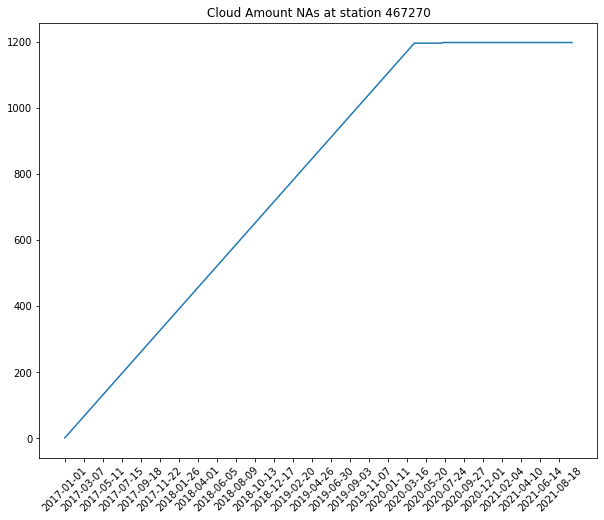

In [ ]:
plt.figure(figsize = (10,8))
plt.title("Cloud Amount NAs at station 467270")
plt.plot(Young["time"],na_young)
plt.xticks(range(0,Young["time"].drop_duplicates().shape[0],65),Young["time"].drop_duplicates().loc[::65],rotation=45)
plt.show()

### 刪去空值過多的4個欄位

In [ ]:
NA_col = ["UVI Max","EvapA","Cloud Amount","VisbMean"]

In [ ]:
dropNACol = dataset.drop(NA_col,axis=1)

In [ ]:
print("除去過多空值的欄位後，資料大小為",dropNACol.shape)
print(f"空值比例：{(dropNACol.shape[0]-dropNACol.dropna(axis=0).shape[0])/dropNACol.shape[0]}")

除去過多空值的欄位後，資料大小為 (53754, 24)
空值比例：0.04202477955128921


### 再丟掉空的列(89筆)

In [ ]:
dropNA_df = dropNACol.dropna(axis=0)

is_NaN = dropNACol.isnull()
row_has_NaN = is_NaN.any(axis=1)
NA_df = dropNACol[row_has_NaN]

In [ ]:
dropNA_df

,time,StnPres,SeaPres,StnPresMax,StnPresMin,Temperature,T Max,T Min,Td dew point,RH,RHMin,WS,WD,WSGust,WDGust,Precp,PrecpHour,PrecpMax10,PrecpMax60,SunShine,SunShineRate,GloblRad,station,city
0,2020-10-01,1009.5000,1010.7000,1011.3000,1007.7000,24.9000,29.4000,20.4000,18.9000,71.0000,42.0000,2.7000,70.0000,10.7000,80.0000,0.0000,0.0000,0.0000,0.0000,6.4000,54.1000,13.8100,466880,center
1,2020-10-02,1009.8000,1011.0000,1011.2000,1007.5000,26.8000,31.7000,23.7000,20.6000,70.0000,40.0000,2.9000,70.0000,12.8000,80.0000,0.0000,0.0000,0.0000,0.0000,8.3000,70.4000,17.5000,466880,center
2,2020-10-03,1009.4000,1010.6000,1010.8000,1006.8000,27.8000,33.6000,21.5000,20.5000,67.0000,40.0000,2.1000,70.0000,8.7000,80.0000,0.0000,0.0000,0.0000,0.0000,8.3000,70.5000,16.3700,466880,center
3,2020-10-04,1008.4000,1009.6000,1010.5000,1005.1000,28.6000,35.3000,22.9000,20.7000,65.0000,32.0000,1.9000,70.0000,9.4000,60.0000,0.0000,0.0000,0.0000,0.0000,8.2000,69.8000,15.1900,466880,center
4,2020-10-05,1012.5000,1013.7000,1015.4000,1010.1000,24.3000,26.9000,22.6000,21.5000,85.0000,73.0000,2.7000,70.0000,9.7000,70.0000,1.0000,5.8000,0.5000,0.5000,0.0000,0.0000,0.8700,466880,center
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53749,2020-09-26,1002.9000,1013.7000,1005.2000,1001.2000,22.7000,24.9000,18.3000,18.7000,79.0000,69.0000,4.2000,40.0000,12.8000,40.0000,10.5000,5.5000,1.0000,3.0000,0.0000,0.0000,6.3800,467990,center
53750,2020-09-27,1004.1000,1014.9000,1005.7000,1003.0000,20.1000,21.4000,18.9000,17.9000,87.0000,78.0000,2.8000,360.0000,12.2000,330.0000,12.0000,7.1000,1.0000,4.0000,0.0000,0.0000,3.6800,467990,center
53751,2020-09-28,1002.9000,1013.7000,1004.8000,1001.3000,21.2000,22.7000,20.0000,19.5000,90.0000,82.0000,2.6000,360.0000,11.6000,350.0000,11.0000,7.5000,1.5000,5.0000,0.0000,0.0000,3.8400,467990,center
53752,2020-09-29,1000.3000,1011.0000,1002.6000,998.2000,21.7000,23.3000,20.6000,19.9000,89.0000,83.0000,2.2000,10.0000,7.7000,30.0000,2.0000,1.2000,1.0000,1.0000,0.0000,0.0000,5.4500,467990,center


## EDA

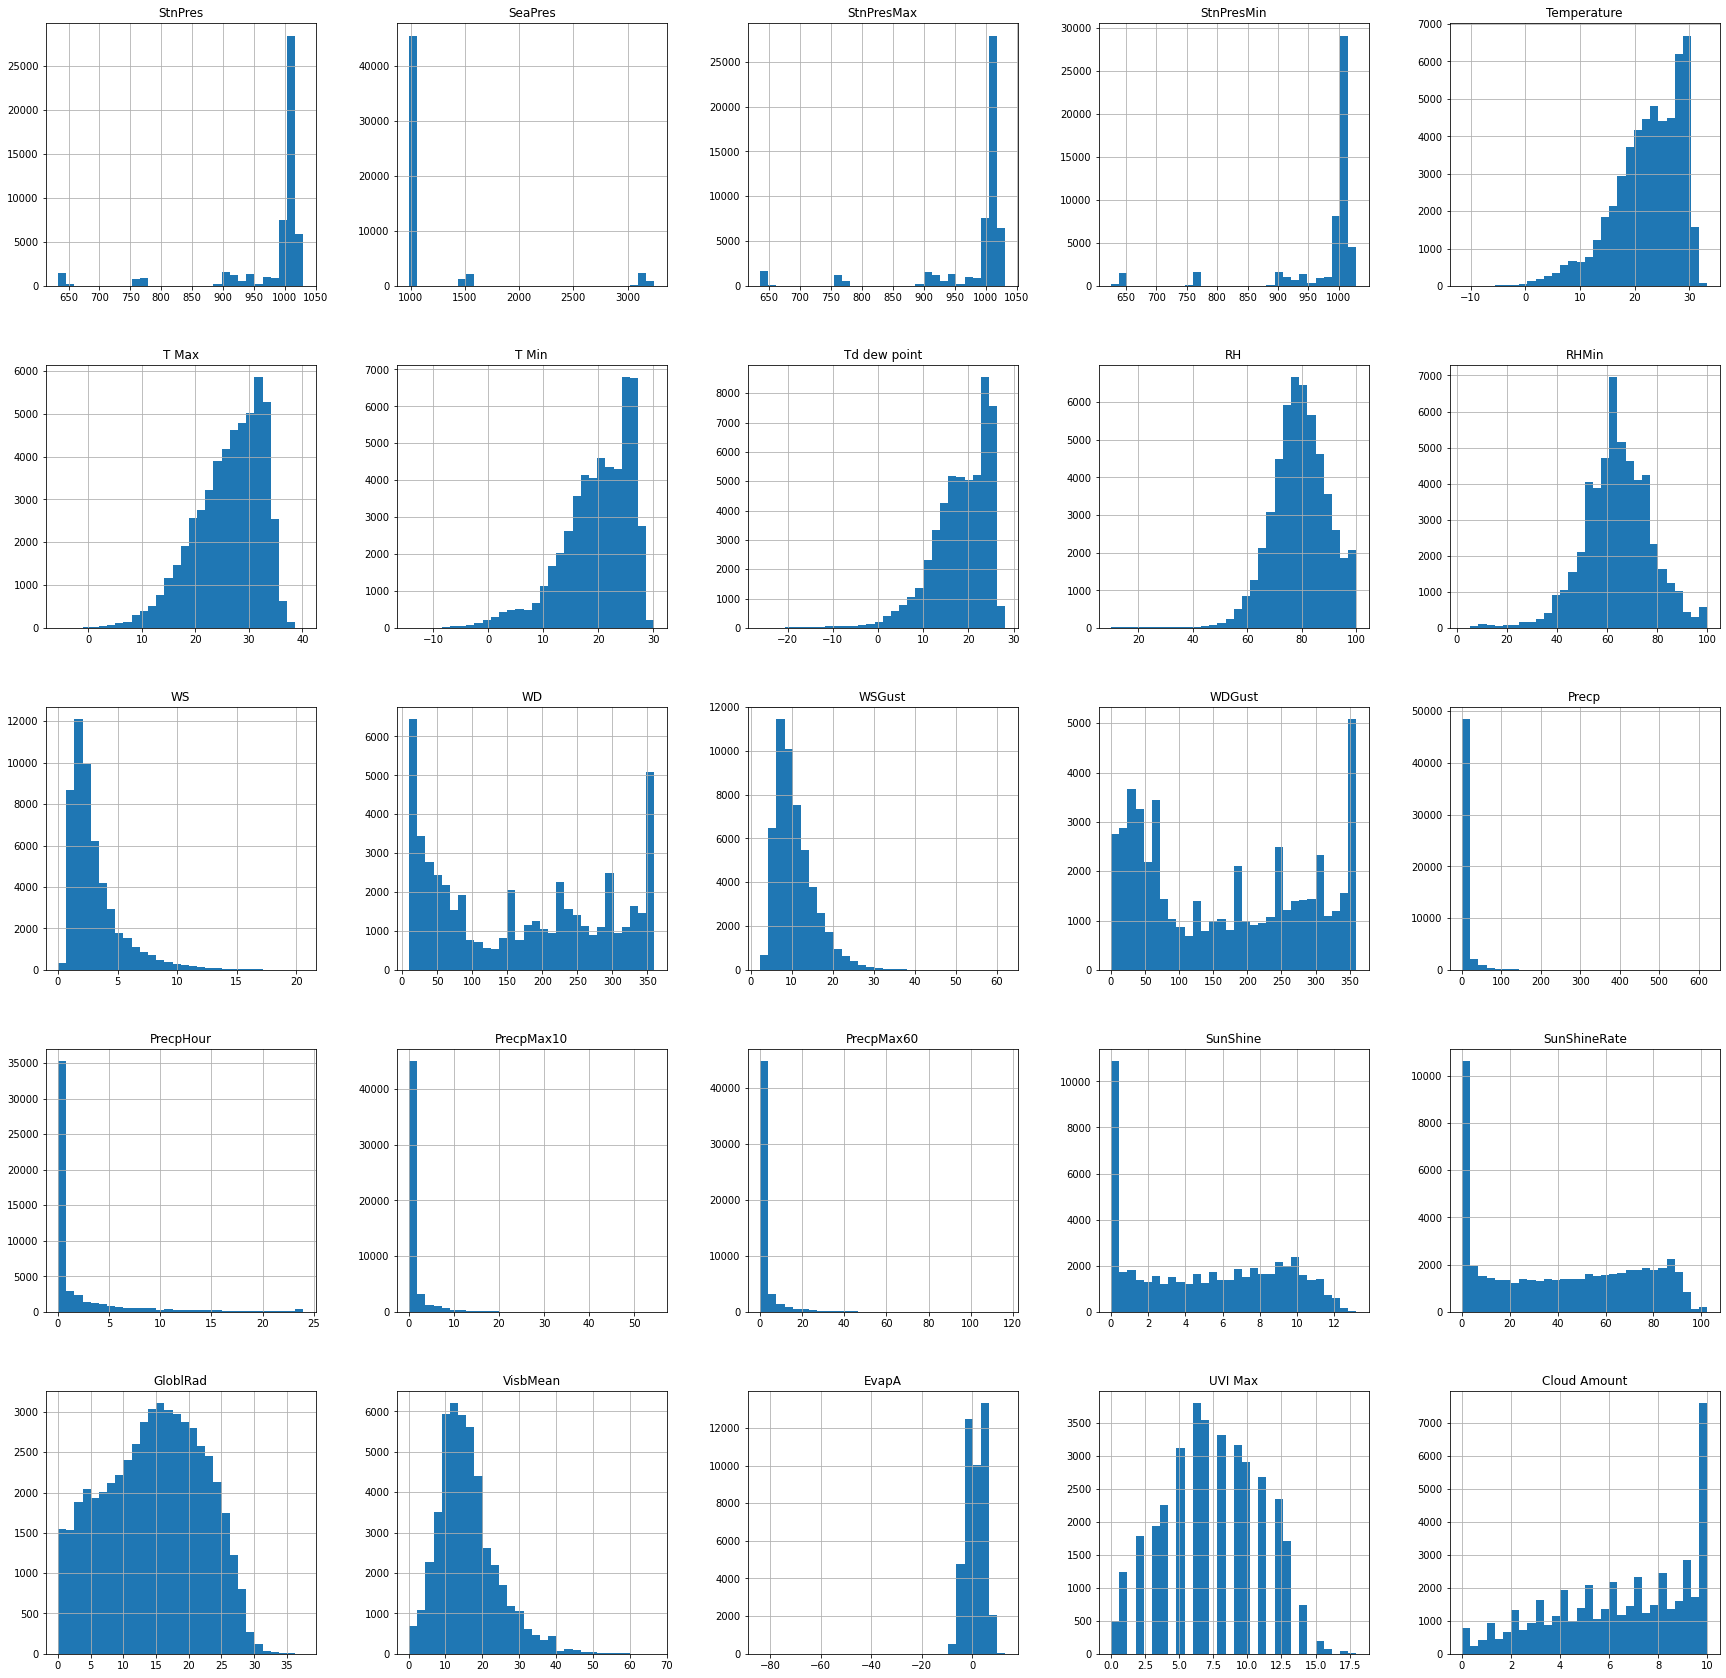

In [ ]:
import matplotlib.pyplot as plt
dataset.hist(bins=30, figsize=(30, 30))
plt.show()

In [ ]:
corr = dropNA_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,StnPres,SeaPres,StnPresMax,StnPresMin,Temperature,T Max,T Min,Td dew point,RH,RHMin,WS,WD,WSGust,WDGust,Precp,PrecpHour,PrecpMax10,PrecpMax60,SunShine,SunShineRate,GloblRad
StnPres,1.000000,-0.959214,0.999957,0.999951,0.605386,0.505796,0.625132,0.566126,-0.088288,0.066198,0.044335,-0.134333,-0.020776,-0.155865,-0.059849,-0.065705,-0.043742,-0.047666,0.016947,0.010439,-0.045875
SeaPres,-0.959214,1.000000,-0.959216,-0.959119,-0.627880,-0.535921,-0.649122,-0.594146,0.060096,-0.086899,-0.073987,0.125155,-0.035382,0.138936,0.039743,0.048092,0.021595,0.027179,-0.025089,-0.012854,0.009760
StnPresMax,0.999957,-0.959216,1.000000,0.999847,0.603977,0.504486,0.623630,0.564927,-0.087905,0.066480,0.045223,-0.134844,-0.018846,-0.156393,-0.058563,-0.064077,-0.042789,-0.046613,0.015335,0.008974,-0.047725
StnPresMin,0.999951,-0.959119,0.999847,1.000000,0.606668,0.506904,0.626517,0.567275,-0.088477,0.066227,0.043390,-0.133968,-0.022990,-0.155651,-0.061300,-0.067349,-0.044655,-0.048777,0.018201,0.011547,-0.044196
Temperature,0.605386,-0.627880,0.603977,0.606668,1.000000,0.963510,0.983428,0.931209,-0.065717,-0.006951,-0.126267,0.053454,-0.165806,0.036984,-0.033715,-0.240106,0.062636,0.037349,0.334315,0.272622,0.423237
T Max,0.505796,-0.535921,0.504486,0.506904,0.963510,1.000000,0.911983,0.863424,-0.150945,-0.160608,-0.220284,0.113913,-0.246999,0.097603,-0.078837,-0.326042,0.040547,0.014033,0.446488,0.390493,0.536281
T Min,0.625132,-0.649122,0.623630,0.626517,0.983428,0.911983,1.000000,0.943028,0.007969,0.097854,-0.060479,0.012606,-0.109384,-0.001424,-0.002456,-0.178871,0.081157,0.057006,0.239514,0.176383,0.333217
Td dew point,0.566126,-0.594146,0.564927,0.567275,0.931209,0.863424,0.943028,1.000000,0.296191,0.298476,-0.120122,0.045985,-0.149569,0.025352,0.070483,-0.077990,0.158421,0.130299,0.158758,0.090945,0.269020
RH,-0.088288,0.060096,-0.087905,-0.088477,-0.065717,-0.150945,0.007969,0.296191,1.000000,0.842847,-0.009182,0.001358,0.029661,-0.010015,0.313385,0.450158,0.298493,0.287384,-0.434335,-0.461189,-0.359140
RHMin,0.066198,-0.086899,0.066480,0.066227,-0.006951,-0.160608,0.097854,0.298476,0.842847,1.000000,0.137481,-0.076279,0.128243,-0.088483,0.303505,0.468166,0.247583,0.242432,-0.483364,-0.509021,-0.427022


## 去除station和city: 含非電廠_centerall2.csv

In [ ]:
drop_from_X_cols =  ['station'] + ['city'] + ["time"]
                  #  + high_corr_drop_cols
X = dropNA_df.drop(columns=drop_from_X_cols)

In [ ]:
X.shape

(51495, 21)

In [ ]:
path = "/content/drive/MyDrive/🍟愛與羈絆的製造小組🍟/data/"
X.to_csv(path+"含非電廠_centerall2.csv",index = False)

## 讀檔：含非電廠_centerall2.csv

In [ ]:
center_all = pd.read_csv('/content/drive/MyDrive/🍟愛與羈絆的製造小組🍟/data/含非電廠_centerall2.csv', encoding="utf-8-sig")
center_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51495 entries, 0 to 51494
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   StnPres       51495 non-null  float64
 1   SeaPres       51495 non-null  float64
 2   StnPresMax    51495 non-null  float64
 3   StnPresMin    51495 non-null  float64
 4   Temperature   51495 non-null  float64
 5   T Max         51495 non-null  float64
 6   T Min         51495 non-null  float64
 7   Td dew point  51495 non-null  float64
 8   RH            51495 non-null  float64
 9   RHMin         51495 non-null  float64
 10  WS            51495 non-null  float64
 11  WD            51495 non-null  float64
 12  WSGust        51495 non-null  float64
 13  WDGust        51495 non-null  float64
 14  Precp         51495 non-null  float64
 15  PrecpHour     51495 non-null  float64
 16  PrecpMax10    51495 non-null  float64
 17  PrecpMax60    51495 non-null  float64
 18  SunShine      51495 non-nu

## 讀要被補的:電廠附近天氣站

In [ ]:
result = pd.read_csv('/content/drive/MyDrive/all.csv', encoding="utf-8-sig")
result['power_percent']=result['power']/(result['裝置容量(瓩)/Installed Capacity(kW)']*24)
dataset = result.copy()
time_cloumn=["time","StnPresMaxTime","StnPresMinTime","T Max Time","T Min Time","RHMinTime","WGustTime","PrecpMax10Time","PrecpMax60Time","UVI Max Time","年度/Year","裝置容量(瓩)/Installed Capacity(kW)","power"]
category_column = ['chinese_name', '月份/Month']
dataset = dataset.drop(columns=time_cloumn)

In [ ]:
for col in dataset.columns:
    if col not in category_column:
      dataset[col] = pd.to_numeric(dataset[col], errors='coerce')
    else:
      print(col)
      dataset[col] = dataset[col].astype(str)

dataset.info()

月份/Month
chinese_name
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72828 entries, 0 to 72827
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StnPres        67346 non-null  float64
 1   SeaPres        17284 non-null  float64
 2   StnPresMax     66875 non-null  float64
 3   StnPresMin     66857 non-null  float64
 4   Temperature    67405 non-null  float64
 5   T Max          66874 non-null  float64
 6   T Min          66829 non-null  float64
 7   Td dew point   17310 non-null  float64
 8   RH             66765 non-null  float64
 9   RHMin          66880 non-null  float64
 10  WS             67437 non-null  float64
 11  WD             67469 non-null  float64
 12  WSGust         66907 non-null  float64
 13  WDGust         66908 non-null  float64
 14  Precp          71761 non-null  float64
 15  PrecpHour      16817 non-null  float64
 16  PrecpMax10     16453 non-null  float64
 17  PrecpMax60     16464 non-nul

### 處理空值

In [ ]:
# 把T當作0.05，其他當空值，後面在看煜柔怎麼填空值~~~(我試過KNN還不錯)
dataset = dataset.replace("&",np.nan).replace("/",np.nan)
dataset = dataset.replace("T",0.05).replace("...",np.nan).replace("X",np.nan)
# 需要drop0
dataset = dataset[dataset['power_percent']>0].reset_index(drop=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35868 entries, 0 to 35867
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StnPres        32179 non-null  float64
 1   SeaPres        7472 non-null   float64
 2   StnPresMax     31867 non-null  float64
 3   StnPresMin     31858 non-null  float64
 4   Temperature    32200 non-null  float64
 5   T Max          31890 non-null  float64
 6   T Min          31833 non-null  float64
 7   Td dew point   7496 non-null   float64
 8   RH             31869 non-null  float64
 9   RHMin          31891 non-null  float64
 10  WS             32196 non-null  float64
 11  WD             32229 non-null  float64
 12  WSGust         31890 non-null  float64
 13  WDGust         31890 non-null  float64
 14  Precp          35218 non-null  float64
 15  PrecpHour      7496 non-null   float64
 16  PrecpMax10     6943 non-null   float64
 17  PrecpMax60     6948 non-null   float64
 18  SunShi

電廠附近空值者？

In [ ]:
NA = {}
for i in dataset.columns:
  NA[i] = [sum(dataset[i].isna())]
pd.DataFrame(NA).T.sort_values(0,ascending = False)

,0
PrecpMax10,28925
PrecpMax60,28920
EvapA,28720
Cloud Amount,28568
VisbMean,28566
UVI Max,28555
SeaPres,28396
SunShineRate,28377
GloblRad,28376
SunShine,28376


### KNN

In [ ]:
TO_Knn = dataset.copy()
TO_Knn = TO_Knn[center_all.columns]

In [ ]:
is_NaN = TO_Knn.isnull()
row_has_NaN = is_NaN.any(axis=1)
NA_df = TO_Knn[row_has_NaN]

In [ ]:
NA_df.shape

(28981, 21)

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5) 
imputer.fit(center_all) 
imputed = imputer.transform(NA_df)
X_knn = pd.DataFrame(imputed, columns=NA_df.columns)

In [ ]:
X_knn.shape

(28981, 21)

In [ ]:
Other_NA = dataset[["月份/Month","chinese_name","power_percent"]][row_has_NaN]
Other_NA = Other_NA.reset_index(drop=True)
Other_NA.shape

(28981, 3)

In [ ]:
# 把他們對應月份也撈回

XX = pd.concat([X_knn,Other_NA], axis=1)

In [ ]:
XX.head()

,StnPres,SeaPres,StnPresMax,StnPresMin,Temperature,T Max,T Min,Td dew point,RH,RHMin,WS,WD,WSGust,WDGust,Precp,PrecpHour,PrecpMax10,PrecpMax60,SunShine,SunShineRate,GloblRad,月份/Month,chinese_name,power_percent
0,1020.7000,1022.0000,1023.3000,1018.3000,18.7000,22.8000,15.8000,13.6200,74.0000,61.0000,2.9000,12.0000,9.1000,51.0000,0.0000,0.0400,0.1000,0.1000,2.2800,21.2800,8.9560,1,金門金沙光電,0.1562
1,1019.3000,1021.8200,1021.6000,1016.9000,18.2000,23.3000,14.2000,15.7800,82.0000,61.0000,1.4000,7.0000,4.7000,111.0000,0.0000,0.9000,0.1000,0.1000,4.6200,43.4000,9.4060,1,金門金沙光電,0.1516
2,1019.4000,1019.2600,1021.5000,1017.4000,18.0000,20.5000,16.4000,14.0200,76.0000,60.0000,3.6000,44.0000,10.5000,88.0000,0.0000,2.7600,0.3000,0.6600,3.7800,34.0400,10.5120,1,金門金沙光電,0.1631
3,1017.8000,1021.8200,1020.2000,1015.9000,17.7000,20.9000,14.2000,12.5400,78.0000,62.0000,1.5000,22.0000,6.3000,25.0000,0.0000,0.3200,0.2400,0.4400,3.8600,35.4800,10.3140,1,金門金沙光電,0.0675
4,1015.8000,1018.5800,1017.9000,1013.6000,19.4000,24.0000,16.2000,17.9400,82.0000,64.0000,1.7000,107.0000,6.2000,115.0000,0.0000,6.4000,0.7000,0.9000,1.2600,11.5800,7.2720,1,金門金沙光電,0.1081


In [ ]:
XX.shape

(28981, 24)

In [ ]:
XX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28981 entries, 0 to 28980
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StnPres        28981 non-null  float64
 1   SeaPres        28981 non-null  float64
 2   StnPresMax     28981 non-null  float64
 3   StnPresMin     28981 non-null  float64
 4   Temperature    28981 non-null  float64
 5   T Max          28981 non-null  float64
 6   T Min          28981 non-null  float64
 7   Td dew point   28981 non-null  float64
 8   RH             28981 non-null  float64
 9   RHMin          28981 non-null  float64
 10  WS             28981 non-null  float64
 11  WD             28981 non-null  float64
 12  WSGust         28981 non-null  float64
 13  WDGust         28981 non-null  float64
 14  Precp          28981 non-null  float64
 15  PrecpHour      28981 non-null  float64
 16  PrecpMax10     28981 non-null  float64
 17  PrecpMax60     28981 non-null  float64
 18  SunShi

In [ ]:
# 確認都沒有空值
for i in XX.columns:
  if sum(XX[i].isna())!=0:
    print(i,sum(XX[i].isna()))

In [ ]:
# 加回滿值的電廠附近資料
TO_Knn.dropna(axis = 0).shape

(6887, 21)

In [ ]:
# 如果一開頭dataset有轉換型態其實不用再跑

W_F = TO_Knn.dropna(axis = 0)
for i in W_F.columns:
  W_F[i] = W_F[i].astype("float64")

In [ ]:
Full = pd.concat([W_F,dataset.loc[TO_Knn.dropna(axis = 0).index][["月份/Month","chinese_name","power_percent"]]],axis = 1)
Full.shape

(6887, 24)

In [ ]:
Full = Full.reset_index(drop = True)

In [ ]:
Full

,StnPres,SeaPres,StnPresMax,StnPresMin,Temperature,T Max,T Min,Td dew point,RH,RHMin,WS,WD,WSGust,WDGust,Precp,PrecpHour,PrecpMax10,PrecpMax60,SunShine,SunShineRate,GloblRad,月份/Month,chinese_name,power_percent
0,1019.5000,1020.9000,1021.5000,1017.5000,20.0000,22.1000,19.3000,16.9000,82.0000,77.0000,4.3000,20.0000,11.7000,30.0000,0.0000,0.0000,0.0000,0.0000,0.3000,2.8000,7.2400,1,澎湖尖山光電,0.0761
1,1018.5000,1019.9000,1020.4000,1016.7000,20.4000,23.2000,19.1000,17.2000,82.0000,71.0000,3.3000,20.0000,9.3000,20.0000,0.0000,0.0000,0.0000,0.0000,4.2000,39.4000,12.5700,1,澎湖尖山光電,0.1174
2,1017.9000,1019.2000,1019.7000,1016.3000,20.3000,21.3000,19.7000,17.1000,82.0000,77.0000,5.1000,20.0000,13.6000,10.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.9600,1,澎湖尖山光電,0.0466
3,1015.3000,1016.7000,1017.2000,1013.3000,20.7000,23.3000,19.5000,17.7000,83.0000,72.0000,2.3000,360.0000,7.2000,40.0000,0.0000,0.0000,0.0000,0.0000,2.9000,27.1000,11.4600,1,澎湖尖山光電,0.1157
4,1014.3000,1015.6000,1016.2000,1012.4000,20.8000,23.9000,19.0000,17.7000,83.0000,71.0000,3.1000,10.0000,9.9000,360.0000,0.0000,0.0000,0.0000,0.0000,3.5000,32.7000,11.5900,1,澎湖尖山光電,0.1103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6882,1010.3000,1012.6000,1011.7000,1008.6000,27.5000,32.4000,23.9000,22.0000,73.0000,51.0000,1.2000,20.0000,8.8000,360.0000,0.0000,0.0000,0.0000,0.0000,8.5000,71.3000,21.4100,9,淡水配水場光電,0.2102
6883,1008.4000,1010.7000,1010.0000,1006.7000,27.6000,32.1000,24.5000,23.4000,79.0000,62.0000,1.4000,20.0000,8.8000,40.0000,0.0000,0.0000,0.0000,0.0000,8.6000,72.3000,21.9400,9,淡水配水場光電,0.2131
6884,1007.2000,1009.5000,1008.7000,1005.6000,26.9000,31.7000,23.4000,22.3000,77.0000,57.0000,1.4000,20.0000,9.8000,60.0000,0.0000,0.0000,0.0000,0.0000,7.7000,64.9000,19.5000,9,淡水配水場光電,0.1861
6885,1005.7000,1008.0000,1007.3000,1004.2000,26.6000,31.4000,21.9000,22.6000,79.0000,62.0000,1.3000,10.0000,7.9000,360.0000,0.0000,0.0000,0.0000,0.0000,9.6000,81.1000,22.6900,9,淡水配水場光電,0.2252


In [ ]:
Full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6887 entries, 0 to 6886
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StnPres        6887 non-null   float64
 1   SeaPres        6887 non-null   float64
 2   StnPresMax     6887 non-null   float64
 3   StnPresMin     6887 non-null   float64
 4   Temperature    6887 non-null   float64
 5   T Max          6887 non-null   float64
 6   T Min          6887 non-null   float64
 7   Td dew point   6887 non-null   float64
 8   RH             6887 non-null   float64
 9   RHMin          6887 non-null   float64
 10  WS             6887 non-null   float64
 11  WD             6887 non-null   float64
 12  WSGust         6887 non-null   float64
 13  WDGust         6887 non-null   float64
 14  Precp          6887 non-null   float64
 15  PrecpHour      6887 non-null   float64
 16  PrecpMax10     6887 non-null   float64
 17  PrecpMax60     6887 non-null   float64
 18  SunShine

In [ ]:
XXX = pd.concat([XX,Full])

In [ ]:
XXX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35868 entries, 0 to 6886
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StnPres        35868 non-null  float64
 1   SeaPres        35868 non-null  float64
 2   StnPresMax     35868 non-null  float64
 3   StnPresMin     35868 non-null  float64
 4   Temperature    35868 non-null  float64
 5   T Max          35868 non-null  float64
 6   T Min          35868 non-null  float64
 7   Td dew point   35868 non-null  float64
 8   RH             35868 non-null  float64
 9   RHMin          35868 non-null  float64
 10  WS             35868 non-null  float64
 11  WD             35868 non-null  float64
 12  WSGust         35868 non-null  float64
 13  WDGust         35868 non-null  float64
 14  Precp          35868 non-null  float64
 15  PrecpHour      35868 non-null  float64
 16  PrecpMax10     35868 non-null  float64
 17  PrecpMax60     35868 non-null  float64
 18  SunShin

In [ ]:
XXX.shape

(35868, 24)

## 輸出X_by_all_center1721

In [ ]:
path = "/content/drive/MyDrive/🍟愛與羈絆的製造小組🍟/data/"
XXX.to_csv(path+"X_by_all_center1721.csv",index = False)

# 二、補完資料做模型

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/🍟愛與羈絆的製造小組🍟/data/X_by_all_center1721.csv', encoding="utf-8-sig")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35868 entries, 0 to 35867
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StnPres        35868 non-null  float64
 1   SeaPres        35868 non-null  float64
 2   StnPresMax     35868 non-null  float64
 3   StnPresMin     35868 non-null  float64
 4   Temperature    35868 non-null  float64
 5   T Max          35868 non-null  float64
 6   T Min          35868 non-null  float64
 7   Td dew point   35868 non-null  float64
 8   RH             35868 non-null  float64
 9   RHMin          35868 non-null  float64
 10  WS             35868 non-null  float64
 11  WD             35868 non-null  float64
 12  WSGust         35868 non-null  float64
 13  WDGust         35868 non-null  float64
 14  Precp          35868 non-null  float64
 15  PrecpHour      35868 non-null  float64
 16  PrecpMax10     35868 non-null  float64
 17  PrecpMax60     35868 non-null  float64
 18  SunShi

In [ ]:
data["月份/Month"] = data["月份/Month"].astype("str")

In [ ]:
data.shape

(35868, 24)

## 設立自變數與應變數

In [ ]:
drop_from_X_cols = ["chinese_name","power_percent"]

X = data.drop(columns=drop_from_X_cols)
y = data['power_percent']

## Get dummy

In [ ]:
numeric_cols = X.columns.drop(['月份/Month']).tolist()
X = pd.get_dummies(X, drop_first=True, columns=['月份/Month'])

In [ ]:
print(X.shape)

(35868, 32)


In [ ]:
X.head()

,StnPres,SeaPres,StnPresMax,StnPresMin,Temperature,T Max,T Min,Td dew point,RH,RHMin,WS,WD,WSGust,WDGust,Precp,PrecpHour,PrecpMax10,PrecpMax60,SunShine,SunShineRate,GloblRad,月份/Month_10,月份/Month_11,月份/Month_12,月份/Month_2,月份/Month_3,月份/Month_4,月份/Month_5,月份/Month_6,月份/Month_7,月份/Month_8,月份/Month_9
0,1020.7000,1022.0000,1023.3000,1018.3000,18.7000,22.8000,15.8000,13.6200,74.0000,61.0000,2.9000,12.0000,9.1000,51.0000,0.0000,0.0400,0.1000,0.1000,2.2800,21.2800,8.9560,0,0,0,0,0,0,0,0,0,0,0
1,1019.3000,1021.8200,1021.6000,1016.9000,18.2000,23.3000,14.2000,15.7800,82.0000,61.0000,1.4000,7.0000,4.7000,111.0000,0.0000,0.9000,0.1000,0.1000,4.6200,43.4000,9.4060,0,0,0,0,0,0,0,0,0,0,0
2,1019.4000,1019.2600,1021.5000,1017.4000,18.0000,20.5000,16.4000,14.0200,76.0000,60.0000,3.6000,44.0000,10.5000,88.0000,0.0000,2.7600,0.3000,0.6600,3.7800,34.0400,10.5120,0,0,0,0,0,0,0,0,0,0,0
3,1017.8000,1021.8200,1020.2000,1015.9000,17.7000,20.9000,14.2000,12.5400,78.0000,62.0000,1.5000,22.0000,6.3000,25.0000,0.0000,0.3200,0.2400,0.4400,3.8600,35.4800,10.3140,0,0,0,0,0,0,0,0,0,0,0
4,1015.8000,1018.5800,1017.9000,1013.6000,19.4000,24.0000,16.2000,17.9400,82.0000,64.0000,1.7000,107.0000,6.2000,115.0000,0.0000,6.4000,0.7000,0.9000,1.2600,11.5800,7.2720,0,0,0,0,0,0,0,0,0,0,0


## 隨機切分訓練資料與測試資料(X_train1721_tomodel)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(28694, 32)
(28694,)
(7174, 32)
(7174,)


In [ ]:
results = {}

# 標準化變數

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std = StandardScaler()
X_train = pd.DataFrame(std.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(std.transform(X_test), columns = X_test.columns)

---
# Linear method

## OLS

In [ ]:
import statsmodels.api as sm

In [ ]:
X_train_const = sm.add_constant(X_train)
model = sm.OLS(list(y_train), X_train_const)
ols_result = model.fit()
X_test_const = sm.add_constant(X_test)
y_pred = ols_result.predict(X_test_const)
# print('r2:', metrics.r2_score(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
results["OLS"] = {"MAE":metrics.mean_absolute_error(y_test, y_pred),"MSE": metrics.mean_squared_error(y_test, y_pred)}

MSE: 0.002474096298498672
MAE: 0.03808800739724168


### 自變數新增平方項

In [ ]:
X_train_poly = X_train[numeric_cols] * X_train[numeric_cols]
X_train_poly = X_train_poly.add_suffix('_poly')
X_train_poly = pd.concat([X_train_poly, X_train], axis='columns')

X_test_poly = X_test[numeric_cols] * X_test[numeric_cols]
X_test_poly = X_test_poly.add_suffix('_poly')
X_test_poly = pd.concat([X_test_poly, X_test], axis='columns')

In [ ]:
X_train_poly_const = sm.add_constant(X_train_poly)
model = sm.OLS(list(y_train), X_train_poly_const)
ols_result = model.fit()
X_test_poly_const = sm.add_constant(X_test_poly)
y_pred = ols_result.predict(X_test_poly_const)
# print('r2:', metrics.r2_score(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
results["OLS_平方項"] = {"MAE":metrics.mean_absolute_error(y_test, y_pred),"MSE": metrics.mean_squared_error(y_test, y_pred)}

MSE: 0.00236543341459448
MAE: 0.03691788034237883


## LASSO

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
lasso_cv = LassoCV(cv=10, random_state=0, max_iter=5000).fit(X_train_poly, y_train)
y_pred = lasso_cv.predict(X_test_poly)
# print('r2:', metrics.r2_score(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('LASSO selects features:', X_train_poly.columns[lasso_cv.coef_ != 0.])
results["LASSO"] = {"MAE":metrics.mean_absolute_error(y_test, y_pred),"MSE": metrics.mean_squared_error(y_test, y_pred)}

MSE: 0.0023795119882578015
MAE: 0.03704347199615826
LASSO selects features: Index(['StnPres_poly', 'SeaPres_poly', 'StnPresMax_poly', 'StnPresMin_poly',
       'Temperature_poly', 'T Max_poly', 'T Min_poly', 'Td dew point_poly',
       'RH_poly', 'RHMin_poly', 'WS_poly', 'WDGust_poly', 'Precp_poly',
       'PrecpHour_poly', 'PrecpMax10_poly', 'PrecpMax60_poly', 'SunShine_poly',
       'GloblRad_poly', 'StnPres', 'SeaPres', 'StnPresMin', 'Temperature',
       'T Max', 'T Min', 'Td dew point', 'RH', 'RHMin', 'WS', 'WD', 'WSGust',
       'WDGust', 'Precp', 'PrecpHour', 'PrecpMax10', 'PrecpMax60',
       'SunShineRate', 'GloblRad', '月份/Month_10', '月份/Month_11', '月份/Month_12',
       '月份/Month_2', '月份/Month_3', '月份/Month_4', '月份/Month_5', '月份/Month_6',
       '月份/Month_7', '月份/Month_8', '月份/Month_9'],
      dtype='object')


## Ridge

In [ ]:
from sklearn.linear_model import RidgeCV

In [ ]:
ridge_cv = RidgeCV(cv=10).fit(X_train_poly, y_train)
y_pred = ridge_cv.predict(X_test_poly)
# print('r2:', metrics.r2_score(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
results["Ridge"] = {"MAE":metrics.mean_absolute_error(y_test, y_pred),"MSE": metrics.mean_squared_error(y_test, y_pred)}

MSE: 0.002365755793691151
MAE: 0.03692400576466467


## Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNetCV

In [ ]:
elasticnet_cv = ElasticNetCV(cv=10).fit(X_train_poly, y_train)
y_pred = elasticnet_cv.predict(X_test_poly)
# print('r2:', metrics.r2_score(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
results["Elastic Net"] = {"MAE":metrics.mean_absolute_error(y_test, y_pred),"MSE": metrics.mean_squared_error(y_test, y_pred)}

MSE: 0.002379700059699398
MAE: 0.037045363078248676


---
# Tree based method

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

## Regression tree
### Hyperparameter tuning: tree depth (1~15) and 10-fold cross validation

In [ ]:
depth = np.arange(1, 20)
metrics_list = ['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error']
score_dict = {}

for metric in metrics_list:
    score_list = []
    for i in depth:
        reg = DecisionTreeRegressor(max_depth = i)
        score = cross_val_score(reg, X_train, y_train, cv=10, scoring=metric)
        score_list.append(sum(score) / len(score))
    score_dict[metric] = score_list

In [ ]:
len(score_dict[metric])

19

Min: 1
Max: 8


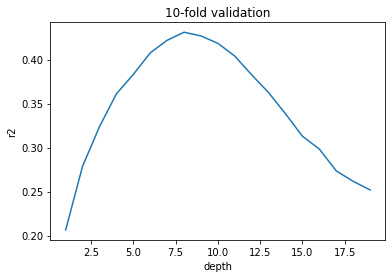

Min: 1
Max: 8


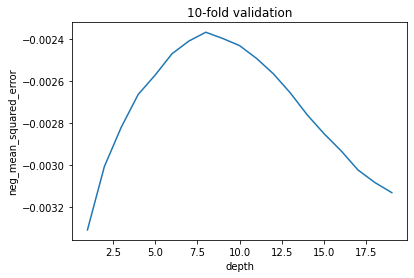

Min: 1
Max: 10


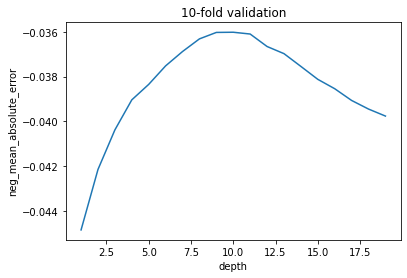

In [ ]:
for metric in metrics_list:
  print("Min:",depth[score_dict[metric].index(min(score_dict[metric]))])
  print("Max:",depth[score_dict[metric].index(max(score_dict[metric]))])
  plt.plot(depth, score_dict[metric])
  plt.xlabel("depth")
  plt.ylabel(metric)
  plt.title("10-fold validation")
  plt.show()

In [ ]:
reg = DecisionTreeRegressor(max_depth = 8)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
#print('r2:', metrics.r2_score(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
results["regression tree"] = {"MAE":metrics.mean_absolute_error(y_test, y_pred),"MSE": metrics.mean_squared_error(y_test, y_pred)}

MSE: 0.002389546991307976
MAE: 0.036683380560577905


## Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
score_dict = {}

for metric in metrics_list:
    score_list = []
    for i in depth:
        reg = RandomForestRegressor(max_depth = i)
        score = cross_val_score(reg, X_train, y_train, cv=10, scoring=metric)
        score_list.append(sum(score) / len(score))
    score_dict[metric] = score_list

Min: 1
Max: 19


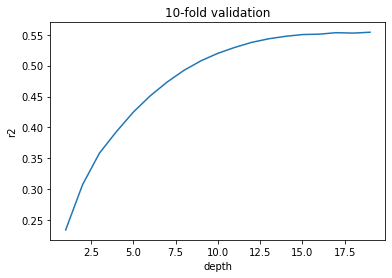

Min: 1
Max: 19


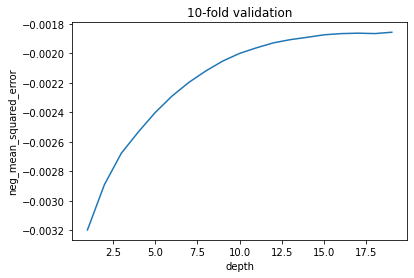

Min: 1
Max: 19


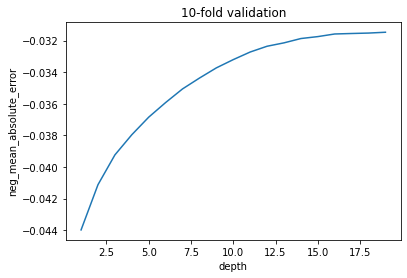

In [ ]:
for metric in metrics_list:
  print("Min:",depth[score_dict[metric].index(min(score_dict[metric]))])
  print("Max:",depth[score_dict[metric].index(max(score_dict[metric]))])
  plt.plot(depth, score_dict[metric])
  plt.xlabel("depth")
  plt.ylabel(metric)
  plt.title("10-fold validation")
  plt.show()

In [ ]:
reg = RandomForestRegressor(max_depth = 19)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
results["random forest"] = {"MAE":metrics.mean_absolute_error(y_test, y_pred),"MSE": metrics.mean_squared_error(y_test, y_pred)}

In [ ]:
filename = "std_RF 方法二, depth=19"
path = f'/content/drive/MyDrive/🍟愛與羈絆的製造小組🍟/code/{filename}.joblib'
from joblib import dump
dump(reg, path) 

### feature importance: rf

In [ ]:
from joblib import load
filename = "std_RF 方法二, depth=19"
path = f'/content/drive/MyDrive/🍟愛與羈絆的製造小組🍟/code/{filename}.joblib'
reg = load(path) 

In [ ]:
Chinese_var = ["測站氣壓(hPa)","海平面氣壓(hPa)","測站最高氣壓(hPa)","測站最低氣壓(hPa)","氣溫(℃)",
               "最高氣溫(℃)","最低氣溫(℃)","露點溫度(℃)","相對溼度(%)","最小相對溼度(%)","風速(m/s)","風向(360degree)",
               "最大陣風(m/s)","最大陣風風向(360degree)","降水量(mm)","降水時數(hour)","最大十分鐘降水量(mm)",
               "最大六十分鐘降水量(mm)","日照時數(hour)","日照率(%)","全天空日射量(MJ/㎡)"]
Eng_var = ['StnPres', 'SeaPres', 'StnPresMax', 'StnPresMin', 'Temperature',
       'T Max', 'T Min', 'Td dew point', 'RH', 'RHMin', 'WS', 'WD',
       'WSGust', 'WDGust', 'Precp', 'PrecpHour', 'PrecpMax10',
       'PrecpMax60', 'SunShine', 'SunShineRate', 'GloblRad']
Variables = {}
for i,j in zip(Eng_var,Chinese_var):
  Variables[i] = j

In [ ]:
Full_var = []
for k in reg.feature_names_in_:
  try:
    Full_var.append(Variables[k])
  except:
    Full_var.append(k)

In [ ]:
# impurity-based feature importances

ft = pd.DataFrame({"feature":Full_var,
              "feature importance":reg.feature_importances_})
ft = ft.sort_values("feature importance")

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

font_path = '/content/drive/MyDrive/🍟愛與羈絆的製造小組🍟/code/STHeiti Light.ttc' 
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = prop.get_name()    

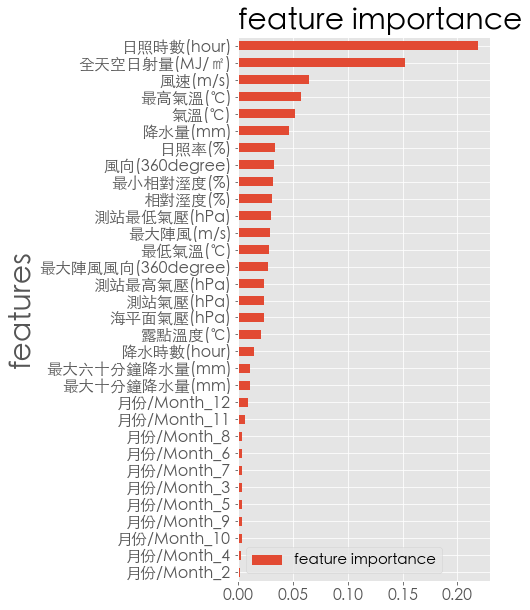

In [ ]:
plt.style.use("ggplot")
ft.plot(x = "feature",kind = "barh",figsize = (4.5,10), fontsize=16)
plt.title('feature importance',fontsize=30,loc="left")
plt.ylabel('features',fontsize=30)
plt.legend(prop={'size': 15})
plt.show()

## GBDT

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gridsearch = np.round(np.logspace(1,3.0,10),0)
gridsearch

array([  10.,   17.,   28.,   46.,   77.,  129.,  215.,  359.,  599.,
       1000.])

In [ ]:
score_dict = {}
metrics_list = ['neg_mean_squared_error', 'neg_mean_absolute_error']
for metric in metrics_list:
    score_list = []
    for c in gridsearch:
        clf = GradientBoostingRegressor(n_estimators=int(c), random_state=0)
        score = cross_val_score(clf, X_train, y_train, cv=10, scoring=metric)
        score_list.append(sum(score) / len(score))
    score_dict[metric] = score_list

Min: 10.0
Max: 1000.0


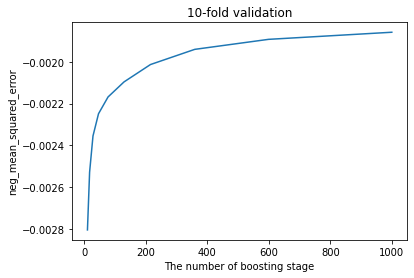

Min: 10.0
Max: 1000.0


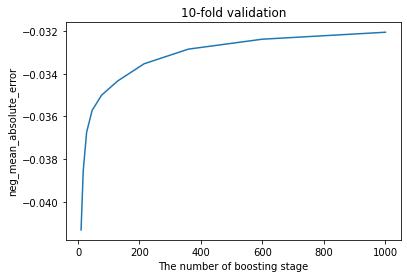

In [ ]:
for metric in metrics_list:
  print("Min:",gridsearch[score_dict[metric].index(min(score_dict[metric]))])
  print("Max:",gridsearch[score_dict[metric].index(max(score_dict[metric]))])
  
  plt.plot(gridsearch, score_dict[metric])
  plt.xlabel("The number of boosting stage")
  plt.ylabel(metric)

    
  plt.title("10-fold validation")
  plt.show()

In [ ]:
reg = GradientBoostingRegressor(n_estimators=1000)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
# print('r2:', metrics.r2_score(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
results["GBDT"] = {"MAE":metrics.mean_absolute_error(y_test, y_pred),"MSE": metrics.mean_squared_error(y_test, y_pred)}

MSE: 0.0018485025347665736
MAE: 0.03225808986094288


### feature importance: GBDT

In [ ]:
# impurity-based feature importance

ft = pd.DataFrame({"feature":reg.feature_names_in_,
              "feature importance":reg.feature_importances_})
ft = ft.sort_values("feature importance")

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

font_path = '/content/drive/MyDrive/🍟愛與羈絆的製造小組🍟/code/STHeiti Light.ttc' 
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = prop.get_name()    

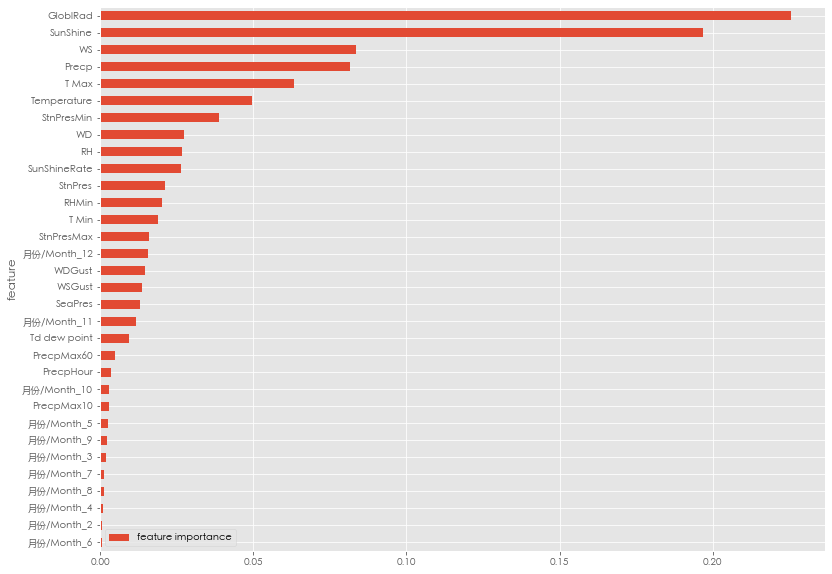

In [ ]:
plt.style.use("ggplot")
ft.plot(y = "feature importance",x = "feature",kind = "barh",figsize = (13,10))
plt.show()

In [ ]:
filename = "std_GBDT 方法二, n_estimators = 1000"
path = f'/content/drive/MyDrive/🍟愛與羈絆的製造小組🍟/code/{filename}.joblib'
from joblib import dump
dump(reg, path) 

['/content/drive/MyDrive/🍟愛與羈絆的製造小組🍟/code/std_GBDT 方法二, n_estimators = 1000.joblib']

# 三、查看testing結果

In [ ]:
pd.DataFrame(results).T.sort_values("MSE")

,MAE,MSE
random forest,0.0314,0.0018
GBDT,0.0323,0.0018
OLS_平方項,0.0369,0.0024
Ridge,0.0369,0.0024
LASSO,0.0370,0.0024
Elastic Net,0.0370,0.0024
regression tree,0.0367,0.0024
OLS,0.0381,0.0025


In [ ]:
pd.DataFrame(results).T.sort_values("MAE")

,MAE,MSE
random forest,0.0314,0.0018
GBDT,0.0323,0.0018
regression tree,0.0367,0.0024
OLS_平方項,0.0369,0.0024
Ridge,0.0369,0.0024
LASSO,0.0370,0.0024
Elastic Net,0.0370,0.0024
OLS,0.0381,0.0025


In [ ]:
pd.DataFrame(results).to_csv(path+'result_std.csv',index=False)

# 四、輸出結果

In [ ]:
path="/content/drive/MyDrive/🍟愛與羈絆的製造小組🍟/data/"
pd.DataFrame(results).T.sort_values("MSE").to_csv(path+"result_方法二_std.csv")

In [ ]:
results = pd.read_csv(path+"result_方法二_std.csv")
results

,Unnamed: 0,MAE,MSE
0,GBDT,0.0323,0.0018
1,random forest,0.0314,0.0018
2,OLS_平方項,0.0369,0.0024
3,Ridge,0.0369,0.0024
4,LASSO,0.0370,0.0024
5,Elastic Net,0.0370,0.0024
6,regression tree,0.0367,0.0024
7,OLS,0.0381,0.0025
